In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [6]:
# Iris data 불러오기
iris=sns.load_dataset('iris') # iris라는 변수명으로 Iris data를 download
X=iris.drop('species',axis=1) # 'species'열을 drop하고 특성변수 X를 정의
y=iris['species'] # 'species'열을 label y를 정의

# Label encoding (0/1으로 변환)
classle=LabelEncoder() 
y=classle.fit_transform(iris['species'].values) # species 열의 문자형을 범주형 값으로 전환

# train/test로 분리
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=123, stratify=y)

# Scaling
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

In [7]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### LDA (linear discriminant analysis)

In [10]:
# Iris data에 대한 LDA 적합
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

cld=LinearDiscriminantAnalysis(store_covariance=True) # 아래 속성이 잘 작동하기 위해서 store_covariance=True로 설정
cld.fit(X_train, y_train)  # LDA 적합
y_train_pred=cld.predict(X_train)
y_test_pred=cld.predict(X_test)

print(accuracy_score(y_train, y_train_pred)) # train data에 대한 accuracy
print(accuracy_score(y_test, y_test_pred)) # test data에 대한 accuracy

0.9714285714285714
0.9777777777777777


In [12]:
# 분류 결과
print(confusion_matrix(y_test, y_test_pred))  # 각 행은 setosa, versicolor, virginica

[[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]


LDA의 각 판별식을 구하기 위한 특성변수의 각 클래스별
- 평균추정치 (means_)
- 전체 평균추정치 (xbar_)
- 분산추정치 (covariance_)
- 클래스별 판별식의 bias (intercept_)
- 계수추정치 (coef_)
<br>를 계산할 수 있다.

In [13]:
# cld: classification linear discriminant
print(cld.means_)  # means: 속성 (1번째 class의 mean)
print(cld.xbar_)  # 전체에 대한 mean
print(cld.covariance_)  # covariance
print(cld.intercept_)  # intercept
print(cld.coef_)  # coefficient

[[5.04285714 3.43428571 1.48857143 0.26571429]
 [5.89714286 2.76       4.22857143 1.3       ]
 [6.51714286 2.92857143 5.49142857 2.00285714]]
[5.81904762 3.04095238 3.73619048 1.18952381]
[[0.24214422 0.09216599 0.13204898 0.03123537]
 [0.09216599 0.11137415 0.05049796 0.03388844]
 [0.13204898 0.05049796 0.15023129 0.03387755]
 [0.03123537 0.03388844 0.03387755 0.04198639]]
[ -7.59067635  -5.09049202 -43.13606185]
[[  3.76019999  15.13062424 -17.99406267 -21.86481204]
 [ -0.91185753  -4.90401617   4.9041086    3.23562397]
 [ -2.84834246 -10.22660807  13.08995407  18.62918807]]


In [15]:
# 확률 추정
print(cld.predict_proba(X_test[:5])) 

[[1.37493315e-32 5.86839618e-01 4.13160382e-01]
 [4.87880054e-42 4.08368248e-04 9.99591632e-01]
 [1.49908347e-19 9.99998532e-01 1.46841688e-06]
 [2.45317549e-24 9.97417042e-01 2.58295753e-03]
 [1.76506456e-50 1.80298359e-07 9.99999820e-01]]


### QDA (quadratic discriminant analysis)

In [16]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

cqd=QuadraticDiscriminantAnalysis(store_covariance=True)
cqd.fit(X_train, y_train) # QDA 적합
y_train_pred=cqd.predict(X_train)
y_test_pred=cqd.predict(X_test)

print(accuracy_score(y_train, y_train_pred)) # train data에 대한 accuracy
print(accuracy_score(y_test, y_test_pred)) # test data에 대한 accuracy

0.9809523809523809
0.9777777777777777


In [17]:
print(cqd.means_)
print(cqd.covariance_)

[[5.04285714 3.43428571 1.48857143 0.26571429]
 [5.89714286 2.76       4.22857143 1.3       ]
 [6.51714286 2.92857143 5.49142857 2.00285714]]
[array([[0.13605042, 0.11084034, 0.0105042 , 0.01239496],
       [0.11084034, 0.14467227, 0.01716807, 0.01444538],
       [0.0105042 , 0.01716807, 0.03280672, 0.0072437 ],
       [0.01239496, 0.01444538, 0.0072437 , 0.01290756]]), array([[0.22793277, 0.07635294, 0.13596639, 0.03647059],
       [0.07635294, 0.09364706, 0.07852941, 0.04058824],
       [0.13596639, 0.07852941, 0.18268908, 0.06      ],
       [0.03647059, 0.04058824, 0.06      , 0.03647059]]), array([[0.38381513, 0.09743697, 0.26132773, 0.04759664],
       [0.09743697, 0.10563025, 0.0602521 , 0.04962185],
       [0.26132773, 0.0602521 , 0.24845378, 0.03737815],
       [0.04759664, 0.04962185, 0.03737815, 0.08028571]])]


In [18]:
# 분류 결과
# versicolor 1개가 virgnica로 잘못 분류되는 것을 알 수 있다.
print(confusion_matrix(y_test, y_test_pred))

[[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]


### NB (Naive Bayes, 나이브 베이즈)

In [20]:
# 다항베이즈모형 적용을 위한 인위적인 자료 생성
X=np.random.randint(5, size=(6,20))  # 1~5로 이뤄진 6 by 20 행렬
y=np.array([1,2,3,4,5,6])
print(X)

[[0 0 0 1 2 0 1 2 1 4 4 2 0 0 3 0 4 4 0 3]
 [1 3 4 4 2 1 0 0 3 3 4 0 0 3 1 0 2 1 4 3]
 [0 1 0 2 1 1 1 2 1 3 4 0 1 2 1 3 3 2 1 3]
 [3 4 2 4 4 4 1 2 1 3 2 1 2 2 2 4 0 0 0 1]
 [2 1 4 2 4 3 1 4 4 1 0 2 3 2 3 4 2 1 1 0]
 [0 2 4 1 1 2 1 0 0 1 0 1 2 4 3 2 1 2 4 4]]


In [21]:
from sklearn.naive_bayes import MultinomialNB  # 다항베이즈모형

mnb=MultinomialNB()
mnb.fit(X, y)
print(mnb.predict(X[1:2,]))

[2]


In [22]:
# Digits 데이터 (1797명이 쓴 0~9를 식별)
from sklearn.datasets import load_digits
digits=load_digits()
print(digits.images.shape) # 8 by 8 pixel로 이루어짐

(1797, 8, 8)


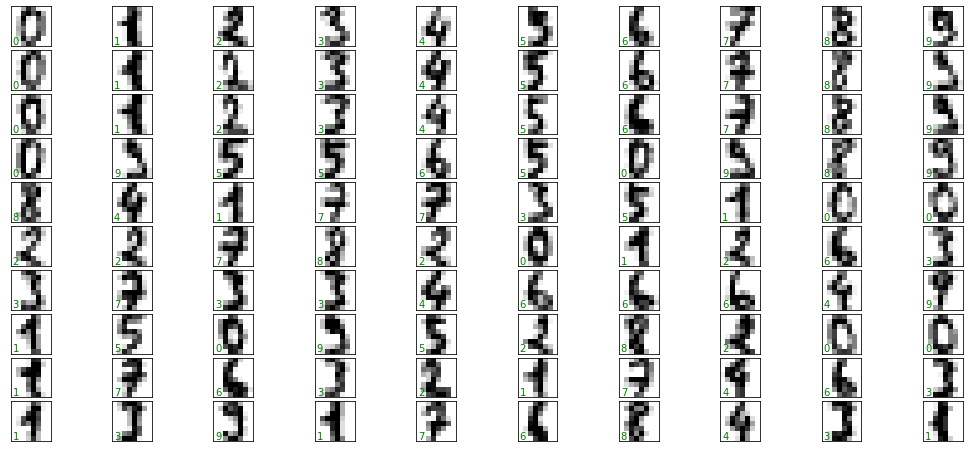

In [24]:
fig, axes=plt.subplots(10, 10, figsize=(18, 8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')

In [25]:
X=digits.data
y=digits.target
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [26]:
# 손글씨 데이터에 대한 정규단순베이즈모형 적합
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.25,random_state=0)

from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()
gnb.fit(X_train, y_train)
y_test_pred=gnb.predict(X_test)

print(accuracy_score(y_test, y_test_pred))

0.8333333333333334


In [27]:
# 분류 결과
# 대각행렬: 정확하게 분류된 결과를 보여주고, 나머지 행렬: 오분류 결과를 보여준다.
mat=confusion_matrix(y_test, y_test_pred)
print(mat)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  0  0  4  0]
 [ 0  7 20  2  0  0  0  0 15  0]
 [ 0  0  0 39  0  0  0  1  5  0]
 [ 0  1  0  0 31  0  0  6  0  0]
 [ 0  1  0  1  0 43  0  3  0  0]
 [ 0  0  1  0  0  0 51  0  0  0]
 [ 0  0  0  0  1  0  0 47  0  0]
 [ 0  6  0  1  0  1  0  2 38  0]
 [ 0  2  0  4  1  0  0  3  7 30]]


Text(91.68, 0.5, 'True values')

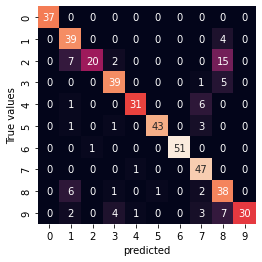

In [28]:
# 행렬 heatmap으로 표현
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted')
plt.ylabel('True values')

단순베이즈모형은 매우 단순한 분류방법이기에 보다 정교한 모형인 SVD나 RF와 같은 모델을 사용하여 분류 정밀도를 높일 수 있다.